옵션의 로(Rho)는 무위험 이자율의 변화에 대한 옵션 가격의 민감도를 나타냅니다.

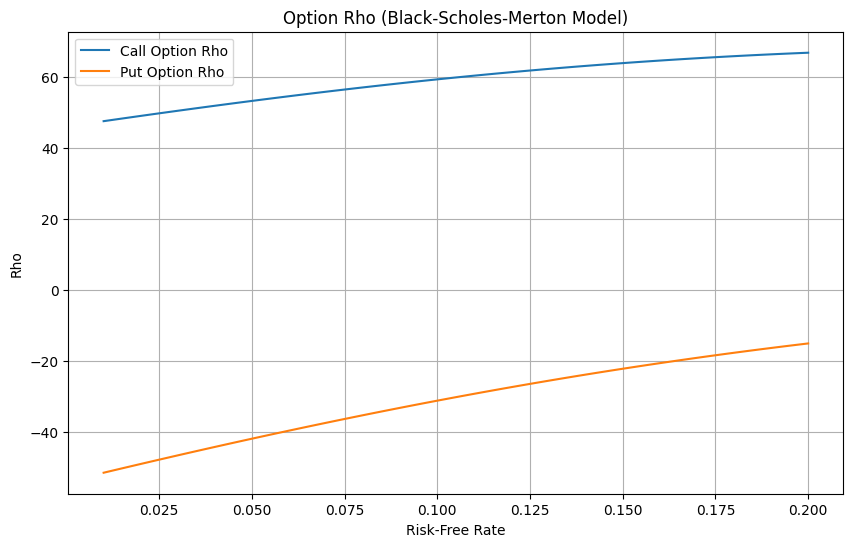

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def black_scholes_merton_rho(S, K, T, r, sigma, option_type="call"):
    """
    블랙-숄즈-머튼 모델을 사용하여 유럽형 옵션의 로를 계산하는 함수

    Parameters:
    S: 현재 주식 가격
    K: 행사가격 (strike price)
    T: 옵션 만기 시간 (단위: 년)
    r: 무위험 이자율
    sigma: 주식 가격의 변동성
    option_type: "call" 또는 "put"

    Returns:
    옵션의 로 값
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    return rho

# 예제 파라미터
S = 100  # 현재 주식 가격
K = 100  # 행사가격
T = 1  # 만기 시간 (1년)
sigma = 0.2  # 변동성

# 무위험 이자율 범위 설정
r_range = np.linspace(0.01, 0.2, 100)

# 로 값 계산
call_rho_values = [black_scholes_merton_rho(S, K, T, r, sigma, option_type="call") for r in r_range]
put_rho_values = [black_scholes_merton_rho(S, K, T, r, sigma, option_type="put") for r in r_range]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(r_range, call_rho_values, label='Call Option Rho')
plt.plot(r_range, put_rho_values, label='Put Option Rho')
plt.title('Option Rho (Black-Scholes-Merton Model)')
plt.xlabel('Risk-Free Rate')
plt.ylabel('Rho')
plt.legend()
plt.grid(True)
plt.show()
